# Overview

* We will analyze two datasets related to Covid-19, Covid-19 World Vaccination Progress by country and Covid -19 death/cases data by country to try.
* We will perfrom hypothesis test to infere if increased Covid-19 vaccination will result in lower Covid-19 case counts.

In [346]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
pd.options.mode.chained_assignment = None  # default='warn'

In [418]:
# Creating df from both the csv files
covid_cases_df = pd.read_csv('Resource/covid-data.csv')
covid_vacc_df = pd.read_csv('Resource/country_vaccinations.csv')


# updating the df to have columns needed for analysis
covid_vacc_df = covid_vacc_df[['country', 'date', 'iso_code', 'people_vaccinated', \
                               'daily_vaccinations', 'people_vaccinated_per_hundred']]

# converting date object to pandas 'datetime64[ns]' format
covid_vacc_df['date'] = pd.to_datetime(covid_vacc_df['date'])

covid_cases_df = covid_cases_df[['location', 'date', 'iso_code', 'total_cases', 'new_cases', \
                                'total_deaths', 'new_deaths', 'population', 'total_cases_per_million', \
                                 'new_cases_per_million']]

owid_covid_cases_df = covid_cases_df[['location', 'date', 'iso_code', 'total_cases', 'new_cases', \
                                'total_deaths', 'new_deaths', 'population']]
                                 

# converting date object to pandas 'datetime64[ns]' format
covid_cases_df['date'] = pd.to_datetime(covid_cases_df['date'])


In [410]:
# Adding total cases per hundred column
covid_cases_df['total_cases_per_hundred'] = (covid_cases_df['total_cases'] / covid_cases_df['population']) * 100

In [412]:
# Dropping the row that contatins world data or continental data
covid_cases_df = covid_cases_df[~covid_cases_df['iso_code'].str.contains('OWID')]

covid_cases_df = covid_cases_df.reset_index(drop=True)

In [414]:
# Dropping the row that contatins world data or continental data

covid_vacc_df = covid_vacc_df[~covid_vacc_df['iso_code'].str.contains('OWID')]

In [5]:
# Grouped max vaccination DF on country
max_covid_vacc_df = covid_vacc_df.groupby(['iso_code'], as_index=False).max().\
                        sort_values(by=['people_vaccinated_per_hundred'], ascending=False).reset_index(drop=True)
max_covid_vacc_df

,iso_code,country,date,people_vaccinated,daily_vaccinations,people_vaccinated_per_hundred
0,GIB,Gibraltar,2022-03-24,42034.0,1068.0,124.76
1,NIU,Niue,2022-03-13,1650.0,87.0,102.23
2,PCN,Pitcairn,2021-09-07,47.0,1.0,100.00
3,ARE,United Arab Emirates,2022-03-29,9890318.0,155312.0,98.99
4,PRT,Portugal,2022-03-10,9663542.0,150867.0,95.04
...,...,...,...,...,...,...
212,YEM,Yemen,2022-03-16,643501.0,10240.0,2.11
213,TCD,Chad,2022-03-18,282003.0,4722.0,1.67
214,HTI,Haiti,2022-03-23,163710.0,5695.0,1.42
215,COD,Democratic Republic of Congo,2022-03-24,853971.0,25961.0,0.92


In [6]:
covid_cases_df

,location,date,iso_code,total_cases,new_cases,total_deaths,new_deaths,population,total_cases_per_million,new_cases_per_million,total_cases_per_hundred
0,Afghanistan,2020-02-24,AFG,5.0,5.0,NaN,NaN,39835428.0,0.126,0.126,0.000013
1,Afghanistan,2020-02-25,AFG,5.0,0.0,NaN,NaN,39835428.0,0.126,0.000,0.000013
2,Afghanistan,2020-02-26,AFG,5.0,0.0,NaN,NaN,39835428.0,0.126,0.000,0.000013
3,Afghanistan,2020-02-27,AFG,5.0,0.0,NaN,NaN,39835428.0,0.126,0.000,0.000013
4,Afghanistan,2020-02-28,AFG,5.0,0.0,NaN,NaN,39835428.0,0.126,0.000,0.000013
...,...,...,...,...,...,...,...,...,...,...,...
155326,Zimbabwe,2022-03-01,ZWE,236871.0,491.0,5395.0,0.0,15092171.0,15694.959,32.533,1.569496
155327,Zimbabwe,2022-03-02,ZWE,237503.0,632.0,5396.0,1.0,15092171.0,15736.835,41.876,1.573683
155328,Zimbabwe,2022-03-03,ZWE,237503.0,0.0,5396.0,0.0,15092171.0,15736.835,0.000,1.573683
155329,Zimbabwe,2022-03-04,ZWE,238739.0,1236.0,5397.0,1.0,15092171.0,15818.731,81.897,1.581873


In [7]:
covid_vacc_df.head(395)

,country,date,iso_code,people_vaccinated,daily_vaccinations,people_vaccinated_per_hundred
0,Afghanistan,2021-02-22,AFG,0.0,NaN,0.00
1,Afghanistan,2021-02-23,AFG,NaN,1367.0,NaN
2,Afghanistan,2021-02-24,AFG,NaN,1367.0,NaN
3,Afghanistan,2021-02-25,AFG,NaN,1367.0,NaN
4,Afghanistan,2021-02-26,AFG,NaN,1367.0,NaN
...,...,...,...,...,...,...
390,Afghanistan,2022-03-19,AFG,NaN,9838.0,NaN
391,Afghanistan,2022-03-20,AFG,NaN,8665.0,NaN
392,Afghanistan,2022-03-21,AFG,NaN,7492.0,NaN
393,Afghanistan,2022-03-22,AFG,5082824.0,6319.0,12.76


In [8]:
# Grouped max covid cases DF on country
# Sorting the DF based on total cases per hundred
# Dropping the rows with NAN values for total cases and resetting the index

max_covid_case_df = covid_cases_df.groupby(['iso_code'], as_index=False).max()

sort_covid_case_per_hund_df = max_covid_case_df.drop(['new_cases', 'new_deaths', 'new_cases_per_million'], \
                           axis=1).sort_values(by=['total_cases_per_hundred'], ascending=False).dropna(subset=['total_cases']).reset_index(drop=True)


# Sorting the DF based on total cases
sort_most_covid_case_df = max_covid_case_df.drop(['new_cases', 'new_deaths', 'new_cases_per_million'], \
                           axis=1).sort_values(by=['total_cases'], ascending=False).dropna(subset=['total_cases']).reset_index(drop=True)

In [9]:
# This df shows the most effected countries based on cases per hundred. 
sort_covid_case_per_hund_df

,iso_code,location,date,total_cases,total_deaths,population,total_cases_per_million,total_cases_per_hundred
0,FRO,Faeroe Islands,2022-03-05,34658.0,28.0,4.905300e+04,706541.904,70.654190
1,AND,Andorra,2022-03-05,38434.0,151.0,7.735400e+04,496858.598,49.685860
2,DNK,Denmark,2022-03-05,2853236.0,4830.0,5.813302e+06,490811.590,49.081159
3,GIB,Gibraltar,2022-03-05,15622.0,101.0,3.369100e+04,463684.664,46.368466
4,SVN,Slovenia,2022-03-05,902744.0,6351.0,2.078723e+06,434278.160,43.427816
...,...,...,...,...,...,...,...,...
209,MHL,Marshall Islands,2022-03-05,7.0,NaN,5.961800e+04,117.414,0.011741
210,COK,Cook Islands,2022-03-05,2.0,NaN,1.757200e+04,113.817,0.011382
211,CHN,China,2022-03-05,110868.0,4654.0,1.444216e+09,76.767,0.007677
212,VUT,Vanuatu,2022-03-05,19.0,1.0,3.144640e+05,60.420,0.006042


In [10]:
# This df shows the most effected countries based on most number of total cases. 
sort_most_covid_case_df

,iso_code,location,date,total_cases,total_deaths,population,total_cases_per_million,total_cases_per_hundred
0,USA,United States,2022-03-05,79265726.0,958437.0,3.329151e+08,238095.936,23.809594
1,IND,India,2022-03-05,42962953.0,515036.0,1.393409e+09,30832.980,3.083298
2,BRA,Brazil,2022-03-05,29040800.0,652216.0,2.139934e+08,135708.832,13.570883
3,FRA,France,2022-03-05,23064766.0,139312.0,6.742200e+07,342095.547,34.209555
4,GBR,United Kingdom,2022-03-05,19172095.0,162152.0,6.820711e+07,281086.442,28.108644
...,...,...,...,...,...,...,...,...
209,VUT,Vanuatu,2022-03-05,19.0,1.0,3.144640e+05,60.420,0.006042
210,MHL,Marshall Islands,2022-03-05,7.0,NaN,5.961800e+04,117.414,0.011741
211,SHN,Saint Helena,2022-03-05,4.0,NaN,6.095000e+03,656.276,0.065628
212,COK,Cook Islands,2022-03-05,2.0,NaN,1.757200e+04,113.817,0.011382


In [11]:
#mergin two dfs on 'iso-code' and 'date'

merge_df = pd.merge(covid_cases_df, covid_vacc_df, on=['iso_code', 'date'], how='outer')
merge_df

,location,date,iso_code,total_cases,new_cases,total_deaths,new_deaths,population,total_cases_per_million,new_cases_per_million,total_cases_per_hundred,country,people_vaccinated,daily_vaccinations,people_vaccinated_per_hundred
0,Afghanistan,2020-02-24,AFG,5.0,5.0,NaN,NaN,39835428.0,0.126,0.126,0.000013,NaN,NaN,NaN,NaN
1,Afghanistan,2020-02-25,AFG,5.0,0.0,NaN,NaN,39835428.0,0.126,0.000,0.000013,NaN,NaN,NaN,NaN
2,Afghanistan,2020-02-26,AFG,5.0,0.0,NaN,NaN,39835428.0,0.126,0.000,0.000013,NaN,NaN,NaN,NaN
3,Afghanistan,2020-02-27,AFG,5.0,0.0,NaN,NaN,39835428.0,0.126,0.000,0.000013,NaN,NaN,NaN,NaN
4,Afghanistan,2020-02-28,AFG,5.0,0.0,NaN,NaN,39835428.0,0.126,0.000,0.000013,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159338,NaN,2022-03-25,ZWE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zimbabwe,4814582.0,69579.0,31.90
159339,NaN,2022-03-26,ZWE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zimbabwe,4886242.0,83429.0,32.38
159340,NaN,2022-03-27,ZWE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zimbabwe,4918147.0,90629.0,32.59
159341,NaN,2022-03-28,ZWE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zimbabwe,4975433.0,100614.0,32.97


In [12]:
#verfying the merge df

merge_df.loc[(merge_df['iso_code'] == 'AFG') & (merge_df['date'] == '2022-03-22')]

,location,date,iso_code,total_cases,new_cases,total_deaths,new_deaths,population,total_cases_per_million,new_cases_per_million,total_cases_per_hundred,country,people_vaccinated,daily_vaccinations,people_vaccinated_per_hundred
155347,NaN,2022-03-22,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,5082824.0,6319.0,12.76


In [363]:
merge_sum_df = pd.DataFrame(merge_df.drop(columns = ['iso_code']).sum())
merge_sum_df

D:\Users\Jacob M\AppData\Local\Temp\ipykernel_27888\3694142189.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  merge_sum_df = pd.DataFrame(merge_df.drop(columns = ['iso_code']).sum())


,0
total_cases,9.876855e+10
new_cases,4.437478e+08
total_deaths,2.005679e+09
new_deaths,5.966331e+06
population,5.913232e+12
total_cases_per_million,4.515470e+09
new_cases_per_million,2.569839e+07
total_cases_per_hundred,4.515470e+05
people_vaccinated,7.127491e+11
daily_vaccinations,1.117899e+10


In [419]:
owid_covid_cases_df.loc[owid_covid_cases_df["iso_code"] == "OWID_WRL"]

,location,date,iso_code,total_cases,new_cases,total_deaths,new_deaths,population
163423,World,2020-01-22,OWID_WRL,557.0,0.0,17.0,0.0,7.874966e+09
163424,World,2020-01-23,OWID_WRL,657.0,100.0,18.0,1.0,7.874966e+09
163425,World,2020-01-24,OWID_WRL,944.0,287.0,26.0,8.0,7.874966e+09
163426,World,2020-01-25,OWID_WRL,1437.0,493.0,42.0,16.0,7.874966e+09
163427,World,2020-01-26,OWID_WRL,2120.0,683.0,56.0,14.0,7.874966e+09
...,...,...,...,...,...,...,...,...
164192,World,2022-03-01,OWID_WRL,438528632.0,1536867.0,5964706.0,8069.0,7.874966e+09
164193,World,2022-03-02,OWID_WRL,440180084.0,1651452.0,5972651.0,7945.0,7.874966e+09
164194,World,2022-03-03,OWID_WRL,442067549.0,1887465.0,5981034.0,8384.0,7.874966e+09
164195,World,2022-03-04,OWID_WRL,443767689.0,1704138.0,5989802.0,8771.0,7.874966e+09


In [13]:
#Relationship Between Total Covid-19 Vaccinations vs Covid-19 cases for the entire dataset
world_covid_vacc = covid_vacc_df.groupby(['date'], as_index=False).sum()


In [89]:
country_daily_list = merge_df.groupby(['iso_code'])['daily_vaccinations'].apply(list)
country_daily_dict = country_daily_list.to_dict()

In [338]:
populations = []
[populations.append(n) for n in merge_df["population"] if n not in populations]
populations_clean = [n for n in populations if str(n) != 'nan']
#len(populations_clean)

In [199]:
first_date = min(merge_df["date"])
first_date_clean = first_date.strftime('%m/%d/%Y')

last_date = max(merge_df["date"])
last_date_clean = last_date.strftime('%m/%d/%Y')

In [200]:
time_delta = last_date - first_date

In [308]:
earliest_case_df = covid_cases_df.sort_values('total_cases')

In [309]:
earliest_case_df["total_cases"] = earliest_case_df["total_cases"].fillna(0)

In [328]:
earliest_case_df = earliest_case_df.loc[date_sort_df['total_cases'] ==1]
earliest_case_df.sort_values('date')

,location,date,iso_code,total_cases,new_cases,total_deaths,new_deaths,population,total_cases_per_million,new_cases_per_million,total_cases_per_hundred
136706,Taiwan,2020-01-22,TWN,1.0,NaN,NaN,NaN,23855008.0,0.042,NaN,4.191992e-06
84085,Macao,2020-01-22,MAC,1.0,NaN,NaN,NaN,658391.0,1.519,NaN,1.518854e-04
130030,South Korea,2020-01-22,KOR,1.0,NaN,NaN,NaN,51305184.0,0.019,NaN,1.949121e-06
147775,United States,2020-01-22,USA,1.0,NaN,NaN,NaN,332915074.0,0.003,NaN,3.003769e-07
130031,South Korea,2020-01-23,KOR,1.0,0.0,NaN,NaN,51305184.0,0.019,0.0,1.949121e-06
...,...,...,...,...,...,...,...,...,...,...,...
92357,Micronesia (country),2022-03-01,FSM,1.0,0.0,NaN,NaN,116255.0,8.602,0.0,8.601781e-04
92358,Micronesia (country),2022-03-02,FSM,1.0,0.0,NaN,NaN,116255.0,8.602,0.0,8.601781e-04
92359,Micronesia (country),2022-03-03,FSM,1.0,0.0,NaN,NaN,116255.0,8.602,0.0,8.601781e-04
92360,Micronesia (country),2022-03-04,FSM,1.0,0.0,NaN,NaN,116255.0,8.602,0.0,8.601781e-04


In [324]:
earliest_case_df.sort_values('date')

Timestamp('2020-01-22 00:00:00')

In [271]:
cases_max_df =  pd.DataFrame(covid_cases_df.groupby(['iso_code'])['total_cases'].max())
cases_max_df.loc[cases_max_df["total_cases"] == "NaN"]

,total_cases
iso_code,


In [275]:
cases_max_df.loc[(cases_max_df['total_cases'] == '33732.0')]

,total_cases
iso_code,


In [196]:
#Summary Datatable
world_summary_df = pd.DataFrame(
    {"Total Countries":[len(country_daily_dict.keys())],
     "Total Population":[sum(populations_clean)],
     "Entire Timespan":[(f"{first_date_clean}-{last_date_clean}")],
     "Total Days": [time_delta.days],
     "Total Cases":[""],
     "Date of First Recorded Case":[""],
     "Most Cases in Single Day": [""],
     "Total Vaccinations":[""],
     "Date of First Recorded Vaccination":[""],
     "Most Vaccinations in Single Day":[""],
    }) 

In [260]:
world_summary_df

,Total Countries,Total Population,Entire Timespan,Total Days,Total Cases,Date of First Recorded Case,Most Cases in Single Day,Total Vaccinations,Date of First Recorded Vaccination,Most Vaccinations in Single Day
0,223,7.843190e+09,01/01/2020-03/29/2022,818,,,,,,


In [348]:
merge_df_total_relationship_df = merge_df[ ["date","iso_code","new_cases","daily_vaccinations"] ]

,date,iso_code,new_cases,daily_vaccinations
0,2020-02-24,AFG,5.0,0.0
1,2020-02-25,AFG,0.0,0.0
2,2020-02-26,AFG,0.0,0.0
3,2020-02-27,AFG,0.0,0.0
4,2020-02-28,AFG,0.0,0.0
...,...,...,...,...
159338,2022-03-25,ZWE,0.0,69579.0
159339,2022-03-26,ZWE,0.0,83429.0
159340,2022-03-27,ZWE,0.0,90629.0
159341,2022-03-28,ZWE,0.0,100614.0


In [423]:

plt.stackplot(merge_df_total_relationship_df['date'],
              merge_df_total_relationship_df['daily_vaccinations'], 
              color='b', alpha=0.5)

plt.stackplot(merge_df_total_relationship_df['date'], 
              merge_df_total_relationship_df['new_cases'], 
              color='r', alpha=0.5)

plt.xlim(merge_df_total_relationship_df['date'].min(), merge_df_total_relationship_df['date'].max())
plt.xticks(rotation=90, fontweight='light',  fontsize='small')
plt.xlabel('Date: Year-Month')
plt.ylabel('Daily Vaccinations vs New Reported Cases')
plt.title('Worldwide Reported Covid Cases plotted'
plt.show()

SyntaxError: invalid syntax (1641357322.py, line 1)

In [332]:
interest_dates_total_rel = (merge_df_total_relationship_df['date'] > '2020-12-1') & \
(merge_df_total_relationship_df['date'] <= '2022-03-8')

total_relationship_df_dates = merge_df_total_relationship_df.loc[interest_dates_total_rel]

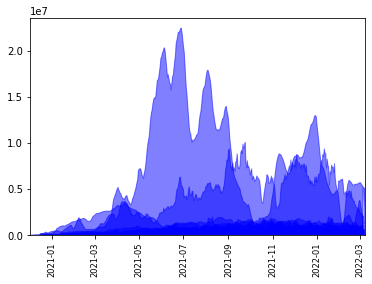

In [356]:
plt.stackplot(total_relationship_df_dates['date'], total_relationship_df_dates['daily_vaccinations'], color='b', alpha=0.5)
plt.xlim(total_relationship_df_dates['date'].min(), total_relationship_df_dates['date'].max())
plt.xticks(rotation=90, fontweight='light',  fontsize='small')
plt.show()

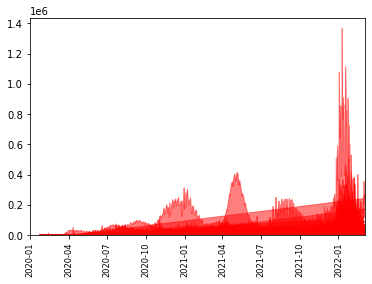

In [359]:
plt.stackplot(covid_cases_df['date'], covid_cases_df['new_cases'], color='r', alpha=0.5)
plt.xlim(covid_cases_df['date'].min(), covid_cases_df['date'].max())
plt.xticks(rotation=90, fontweight='light',  fontsize='small')
plt.show()

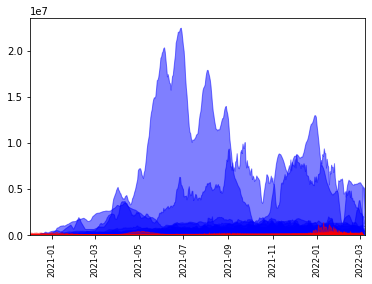

In [17]:
plt.stackplot(total_relationship_df_dates['date'], total_relationship_df_dates['daily_vaccinations'], color='b', alpha=0.5)
plt.stackplot(total_relationship_df_dates['date'], total_relationship_df_dates['new_cases'], color='r', alpha=0.5)
plt.xlim(total_relationship_df_dates['date'].min(), total_relationship_df_dates['date'].max())
plt.xticks(rotation=90, fontweight='light',  fontsize='small')
plt.show()

Overwhelmingly, on a global scale, the population of those vaccinated far exceeded the population of recorded cases. 

In [151]:
interest_dates_cases_before = (merge_df_total_relationship_df['date'] > merge_df_total_relationship_df['date'].min()) & \
(merge_df_total_relationship_df['date'] <= total_relationship_df_dates['date'].min())

cases_before_df = merge_df_total_relationship_df.loc[interest_dates_cases_before]

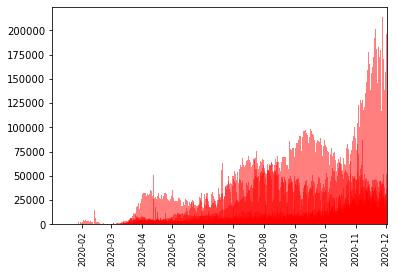

In [20]:
plt.bar(relationship_df_cases['date'], relationship_df_cases['daily_vaccinations'], color='b', alpha=0.5)
plt.bar(relationship_df_cases['date'], relationship_df_cases['new_cases'], color='r', alpha=0.5)
plt.xlim(relationship_df_cases['date'].min(), relationship_df_cases['date'].max())
plt.xticks(rotation=90, fontweight='light',  fontsize='small')
plt.show()

In [ ]:
max_key, max_value = max(country_daily_dict.items(), key = lambda x: len(set(x[1])))
min_key, min_value = min(country_daily_dict.items(), key = lambda y: len(set(y[1])))
print(max_key, len(max_value))
print(min_key, len(min_value))

In [ ]:
country_daily_dict_equal = {}
for k,v in country_daily_dict.items():
    if len(v) < len(max_value):
        zeroes = [0]*(len(max_value)-len(v))
        country_daily_dict_equal[k] = zeroes+v
    else:
        country_daily_dict_equal[k] = v

In [ ]:
max_key_v2, max_value_v2 = max(country_daily_dict_equal.items(), key = lambda z: len(set(z[1])))
min_key_v2, min_value_v2 = min(country_daily_dict_equal.items(), key = lambda α: len(set(α[1])))
print(min_key_v2, len(min_value_v2))
print(max_key_v2, len(max_value_v2))

# sample plot

In [17]:
isreal_df = merge_df.loc[merge_df['iso_code'] == 'ISR']
isreal_df

,location,date,iso_code,total_cases,new_cases,total_deaths,new_deaths,population,total_cases_per_million,new_cases_per_million,total_cases_per_hundred,country,people_vaccinated,daily_vaccinations,people_vaccinated_per_hundred
70271,Israel,2020-02-20,ISR,NaN,NaN,NaN,NaN,9291000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70272,Israel,2020-02-21,ISR,1.0,1.0,NaN,NaN,9291000.0,0.108,0.108,0.000011,NaN,NaN,NaN,NaN
70273,Israel,2020-02-22,ISR,1.0,0.0,NaN,NaN,9291000.0,0.108,0.000,0.000011,NaN,NaN,NaN,NaN
70274,Israel,2020-02-23,ISR,1.0,0.0,NaN,NaN,9291000.0,0.108,0.000,0.000011,NaN,NaN,NaN,NaN
70275,Israel,2020-02-24,ISR,1.0,0.0,NaN,NaN,9291000.0,0.108,0.000,0.000011,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157118,NaN,2022-03-25,ISR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Israel,6702307.0,1973.0,72.14
157119,NaN,2022-03-26,ISR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Israel,6702318.0,1982.0,72.14
157120,NaN,2022-03-27,ISR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Israel,6702475.0,2290.0,72.14
157121,NaN,2022-03-28,ISR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Israel,6702589.0,2513.0,72.14


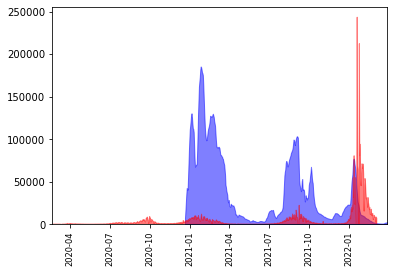

In [22]:
plt.stackplot(isreal_df['date'], isreal_df['daily_vaccinations'], color='b', alpha=0.5)
plt.stackplot(isreal_df['date'], isreal_df['new_cases'], color='r', alpha=0.5)
plt.xlim(isreal_df['date'].min(), isreal_df['date'].max())
plt.xticks(rotation=90, fontweight='light',  fontsize='small')
plt.show()

In [ ]:
isreal_df

In [ ]:
isreal_df.loc[isreal_df['new_cases'] == isreal_df['new_cases'].max()]

In [ ]:
plt.scatter( isreal_df['daily_vaccinations'], isreal_df['new_cases'])

In [ ]:
plt.scatter(isreal_df['date'], isreal_df['daily_vaccinations'], color='b', alpha=0.5)